# Download Datasets

Tutorial download kaggle dataset melalui google colab

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

Install package `kaggle` untuk mendownload dataset melalui kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload `kaggle.json` yang didapatkan dari API token di akun kaggle masing masing

In [ ]:
from google.colab import files
uploaded = files.upload()

Tambahkan `kaggle.json` kedalam source milik google colab agar package bisa mendownload dataset menggunakan akun dan API key milik Kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download Dataset dengan menjalankan perintah dibawah :

(link alternatif) :  
https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset

In [ ]:
! kaggle datasets download sid321axn/gold-price-prediction-dataset

gold-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip dataset

In [ ]:
! unzip gold-price-prediction-dataset.zip

Archive:  gold-price-prediction-dataset.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Import Library


Import Library yang dibutuhkan pada proyek ini

In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importing layers from keras. Use LSTM for input layer, and Dense for hidden and output layer
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

# Import for splitting test and training data set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Import Adam Optimizers
from tensorflow.keras.optimizers import Adam


from keras.callbacks import  EarlyStopping

# Data Understanding

Pada Submission ini, dataset diambil dari [Kaggle](https://www.kaggle.com/) dengan nama dataset [Gold Price Prediction Dataset](https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset)


Tampilkan dataset dalam bentuk tabel.

Sesuai yang telah dijelaskan di `Readme.md`. Pada proyek ini menggunakan 6 Kolom termasuk kolom label yang digunakan untuk melakukan prediksi harga emas

diantaranya kolom : `'Date'`, `'Open'`, `'High'`, `'Low'`,`'Close'`,`'Adj Close'` dan `'Volume'`

In [ ]:
df = pd.read_csv('/content/FINAL_USO.csv', parse_dates=True, squeeze=True)
df = df[['Date', 'Open', 'High', 'Low','Close','Adj Close', 'Volume']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


Berikut adalah total data dan _range_ tanggal dari dataset yang telah di _load_

In [ ]:
print("Total Data : {} \n".format(len(df)))
print("Date range from : {} to {}".format(df.head(1)['Date'].values, df.tail(1)['Date'].values))

Total Data : 1718 

Date range from : ['2011-12-15'] to ['2018-12-31']


Kode program dibawah digunakan untuk melihat informasi kolom dan juga melihat jumlah _record_ yang memiliki data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1718 non-null   object 
 1   Open       1718 non-null   float64
 2   High       1718 non-null   float64
 3   Low        1718 non-null   float64
 4   Close      1718 non-null   float64
 5   Adj Close  1718 non-null   float64
 6   Volume     1718 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.1+ KB


apabila terdapat record yang nilainya dibawah panjang record (> 1718) maka hapus record tersebut dengan menjalankan kode program dibawah

In [ ]:
df_new = df.dropna(how='any',axis=0) 
df_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100
...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700


Kode program dibawah digunakan untuk menampilan statistik deskriptif mencakup statistik yang merangkum kecenderungan sentral, dispersi, dan bentuk distribusi himpunan data

In [ ]:
df_new.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07


Rubah format tanggal yang sebelumnya masih `text` / `string` menjadi format `date`

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'] , format='%Y-%m-%d')
df_new['Date']

0      2011-12-15
1      2011-12-16
2      2011-12-19
3      2011-12-20
4      2011-12-21
          ...    
1713   2018-12-24
1714   2018-12-26
1715   2018-12-27
1716   2018-12-28
1717   2018-12-31
Name: Date, Length: 1718, dtype: datetime64[ns]

Tampilkan visualisasi dalam bentuk grafik dengan `y-axis` berisi kolom `'Open'`, `'Close'`, `'High'` dan nilai `x-axis` dengan nilai `'Date'`

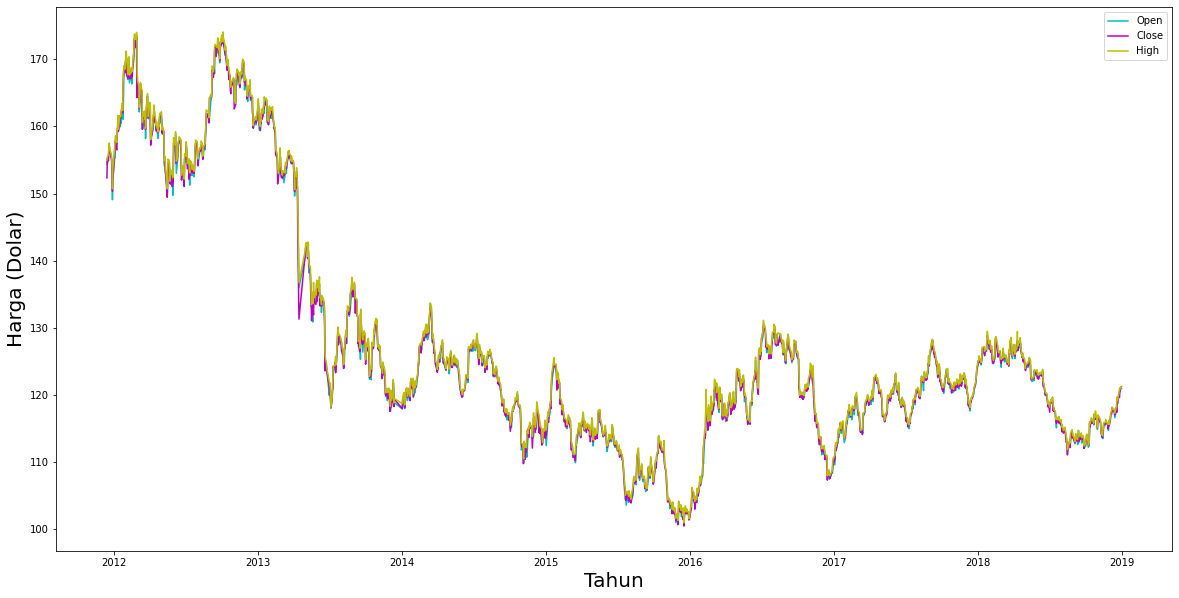

In [ ]:
visual_plot =df_new[['Date','Close', 'Open', 'High']]

plt.figure(figsize=(20,10))

sns.lineplot(y=visual_plot['Open'], color="c", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['Close'], color="m", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['High'], color="y", x=visual_plot['Date'])

plt.xlabel('Tahun', fontsize=20)
plt.ylabel('Harga (Dolar)', fontsize=20)
plt.legend(['Open','Close','High'], loc='upper right')

lihat korelasi antar fitur yang mempengaruhi pergerakan saham berdasarkan dataset yang ada

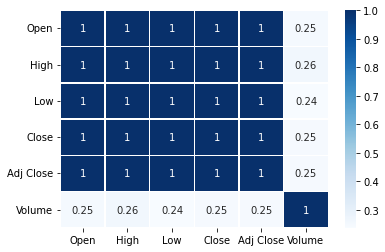

In [ ]:
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap='Blues', linewidths=0.5)

# Data Preparation

Pastikan dataset terhindar dari _missing value_ dan terdapat duplikasi didalamnya

In [ ]:
df_new.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
check_duplicates = df_new[df_new.duplicated()]
print(check_duplicates)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
df_new_dropped = df_new.drop(['Volume'], axis=1)

Reduksi dimensi dengan PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df_new_dropped[['Low', 'Open','High','Close', 'Adj Close']])

df_new_dropped['dimension'] = pca.transform(df_new_dropped.loc[:, ('Low', 'Open','High','Close', 'Adj Close')]).flatten()
df_new_dropped.drop(['Low', 'Open','High','Close', 'Adj Close'], axis=1, inplace=True)

df_new_dropped

,Date,dimension
0,2011-12-15,57.904111
1,2011-12-16,61.468551
2,2011-12-19,62.094206
3,2011-12-20,66.273817
4,2011-12-21,66.351704
...,...,...
1713,2018-12-24,-16.670848
1714,2018-12-26,-16.136585
1715,2018-12-27,-15.136428
1716,2018-12-28,-14.256552


Rubah Kolom Date Menjadi index

In [ ]:
df_new_dropped.index = df_new_dropped['Date']
df_new_dropped = df_new_dropped.drop(columns='Date')
df_new_dropped

,dimension
Date,
2011-12-15,57.904111
2011-12-16,61.468551
2011-12-19,62.094206
2011-12-20,66.273817
2011-12-21,66.351704
...,...
2018-12-24,-16.670848
2018-12-26,-16.136585
2018-12-27,-15.136428


Bagi Dataset dengan skala 80:20

In [ ]:
# Splitting dataset
train_set = df_new_dropped[:int(len(df_new_dropped)*0.8) :]
test_set = df_new_dropped[int(len(df_new_dropped)*0.8):len(df_new_dropped) :]

In [ ]:
train_set

,dimension
Date,
2011-12-15,57.904111
2011-12-16,61.468551
2011-12-19,62.094206
2011-12-20,66.273817
2011-12-21,66.351704
...,...
2017-08-04,-17.023497
2017-08-07,-17.409534
2017-08-08,-16.888171


In [ ]:
test_set

,dimension
Date,
2011-12-15,57.904111
2011-12-16,61.468551
2011-12-19,62.094206
2011-12-20,66.273817
2011-12-21,66.351704
...,...
2017-08-04,-17.023497
2017-08-07,-17.409534
2017-08-08,-16.888171


In [ ]:
def dataset_preparation(dataset, window):
    dframe = []
    label = []

    for i in range(len(dataset) - window - 1):
        data = dataset[i:(i + window), 0]
        dframe.append(data)
        label.append(dataset[i+window,0])
    return np.array(dframe), np.array(label)

Proses MinMax Scaling

In [ ]:

minmax_scaler = MinMaxScaler()
scaled_train_set = minmax_scaler.fit_transform(train_set)
scaled_test_set = minmax_scaler.fit_transform(test_set)

Menyiapkan himpunan data dengan ukuran jendela yang ditentukan

In [ ]:

x_train, y_train = dataset_preparation(scaled_train_set,80)
x_test, y_test = dataset_preparation(scaled_test_set,80)

Rubah ulang _shape_ dataset

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_train.shape[1],1))

In [ ]:
print("\n----MinMax Scaled Data----")
print("All data : {}".format(len(scaled_train_set)))  

print("\n----Splitted Data----")
print("Train Set shapes : {} {}".format(x_train.shape, y_train.shape))
print("Test Set shapes : {} {}".format(x_test.shape, y_test.shape))



----MinMax Scaled Data----
All data : 1374

----Splitted Data----
Train Set shapes : (1293, 80, 1) (1293,)
Test Set shapes : (263, 80, 1) (263,)


# Arsitektur Model

Susun Arsitektur Model
* LTSM sebagai input layer
* Dropout sebagai hidden layer
* Dense sebagai output layer

In [ ]:
model = Sequential([
  LSTM(60),
  Dropout(0.5),
  Dense(32),
  Dense(1),
])

Tentukan Algoritma Optimasi dan parameter yang ingin digunakan
dan kompilasi model dengan menggunakan metriks MAE dan _function loss_ MSE

In [ ]:
# Setting optimizer Adam Optimizer and learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model with Huber and MAE (Mean Absolute Error) metrics
model.compile(
    metrics=["mae"],
    optimizer=optimizer,
    loss='mean_squared_error')

# Model Training

Inisialasi Callback dengan menggunakan EarlyStopping

proses training akan berhenti ketika hasil metriks yang dimonitor tidak berkembang selama 5 epoch

In [ ]:
callbacks = EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)

In [ ]:
# Mae = (train_set['dimension'].max() - train_set['dimension'].min()) * (1/100)
# Mae = round(Mae,2)
# print(Mae)
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('mae')<Mae and logs.get('val_mae')<Mae):
#       print("\nMAE dari model < 1% skala data : ", )
# callbacks_mae = myCallback()

Latih Model dan simpan kedalam variabel `history`

In [ ]:
# Training Model and save it to history variable.
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[callbacks])

Epoch 1/30
41/41 [==============================] - 5s 57ms/step - loss: 0.0169 - mae: 0.0837 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 2/30
41/41 [==============================] - 2s 43ms/step - loss: 0.0028 - mae: 0.0375 - val_loss: 0.0026 - val_mae: 0.0400
Epoch 3/30
41/41 [==============================] - 2s 42ms/step - loss: 0.0024 - mae: 0.0356 - val_loss: 0.0027 - val_mae: 0.0403
Epoch 4/30
41/41 [==============================] - 3s 63ms/step - loss: 0.0027 - mae: 0.0383 - val_loss: 0.0026 - val_mae: 0.0402
Epoch 5/30
41/41 [==============================] - 2s 42ms/step - loss: 0.0025 - mae: 0.0363 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 6/30
41/41 [==============================] - 2s 42ms/step - loss: 0.0019 - mae: 0.0316 - val_loss: 0.0026 - val_mae: 0.0402


# Model Evaluation

Tampilkan grafik yang menunjukan hasil pelatihan testing dan trainin untuk value dan loss value

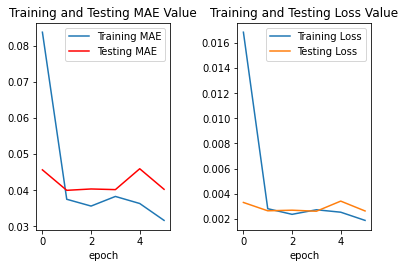

In [ ]:
# Create plot for mae and val_mae
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'], 'r')
plt.title('Training and Testing MAE Value')
plt.xlabel('epoch')
plt.legend(['Training MAE', 'Testing MAE'], loc='upper right')

# Create plot for loss and val_loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss Value')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()

# Model Prediction

Buat dataframe baru untuk menyimpan  _actual value_ dan _prediction_, lalu tambahkan kolom `'Date'` dari variable df. Setelah semua kolom mempunyai data, kita dapat melihat harga asli dan prediksi harga dari data training yang telah dijalankan

In [ ]:
predict_test = model.predict(x_test)
predict_test = minmax_scaler.inverse_transform(predict_test)
actual_test = minmax_scaler.inverse_transform([y_test])

In [ ]:
data_predict_and_actual = {'actual_value':actual_test[0], 'prediction_value' : predict_test[:,0]}

df_predict = pd.DataFrame(data_predict_and_actual)
df_predict['Date'] = df['Date'][:len(df_predict['actual_value'])]

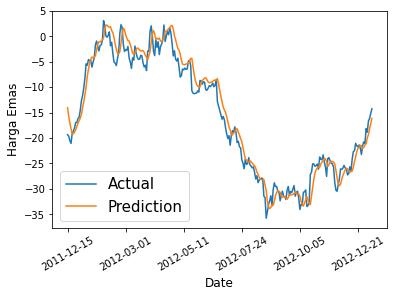

In [ ]:
df_predict.plot(x="Date" )
plt.ylabel('Harga Emas', size=12)

plt.xlabel('Date', size=12)
plt.xticks(rotation=30)

plt.legend(["Actual", "Prediction"], fontsize=15, loc='lower left')
plt.show();